## Supplemental analyses and Figures scripts for the manuscript "Cultural Individualism/Collectivism Moderates the Effects of Climate Action Interventions"

In [2]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import bff
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
#%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#import main df
df = pd.read_excel("data63.xlsx")

#load predictor dataframe
predictordata = pd.read_excel("PredictorData.xlsx")

#merge main dataframe with predictor data & wvs survey data
df = df.merge(predictordata, on='Country', how='left')

In [4]:
df = df.rename(columns={"IndividualismHI": "Ind_score"})
#create variable split around 50
df['Ind_ms'] = df['Ind_score'].apply(lambda x: 1 if x < 50 else 2)

#global median split
df_col = df.loc[df['Ind_ms']==1] #dataframe for collectivist countries
df_ind = df.loc[df['Ind_ms']==2] #dataframe for individualist countries
df = df.dropna(subset=['Ind_ms'])
#59440 participants

## Supplemental Analyses & Figures

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Load R in Python
%load_ext rpy2.ipython

%R library(lme4)
%R library(lmerTest)
%R library(ordinal)

Loading required package: Matrix



Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



array(['ordinal', 'lmerTest', 'lme4', 'Matrix', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'],
      dtype='<U9')

# 1.1 Belief

In [6]:
df_belief = pd.melt(
    df.loc[:, ['ResponseId', 'Country', 'condName', 'Ind_score', "Ind_ms", "Income", "Edu", "Age", "Gender", "GDP", "EPI", 'Belief1', 'Belief2', 'Belief3', 'Belief4']],
    id_vars=['ResponseId', 'Country', 'condName', 'Ind_score', "Ind_ms", "Income", "Edu", "Age", "Gender", "GDP", "EPI"],
    var_name="Item",
    value_name="Belief"
)
df_belief['condName'] = df_belief['condName'].replace(['Control'], 'aControl')
df_belief = df_belief.dropna(subset=["ResponseId", "Belief", "condName"])

In [7]:
#create separate dataframes
df_col_belief = df_belief.loc[df_belief['Ind_ms']==1] #dataframe for collectivist countries
df_ind_belief = df_belief.loc[df_belief['Ind_ms']==2] #dataframe for individualist countries
%Rpush df_col_belief
%Rpush df_ind_belief

### Collectivist Countries

In [8]:
%%R
M1 <- lmer(Belief ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item), data = df_col_belief)
print(summary(M1))

write.csv(coef(summary(M1)), "coef_col_belief.csv") #export coefficients to csv

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Belief ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item)
   Data: df_col_belief

REML criterion at convergence: 819139.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.0602 -0.2143  0.1155  0.2875  5.4821 

Random effects:
 Groups     Name        Variance Std.Dev.
 ResponseId (Intercept) 337.7185 18.3771 
 Country    (Intercept)  30.3186  5.5062 
 Item       (Intercept)   0.2804  0.5295 
 Residual               162.2150 12.7364 
Number of obs: 96517, groups:  ResponseId, 24187; Country, 38; Item, 4

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              8.259e+01  1.028e+00 5.657e+01  80.378  < 2e-16 ***
condNameBindingMoral     5.196e-01  6.054e-01 2.407e+04   0.858 0.390789    
condNameCollectAction    1.803e+00  6.006e-01 2.407e+04   3.002 0.002683 ** 
condNameDynamicNorm      5.409e-01  6.011e-01 2.408

In addition: Warning message:
In checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv,  :
  Model failed to converge with max|grad| = 0.334097 (tol = 0.002, component 1)


### Individualist Countries

In [9]:
%%R
M1 <- lmer(Belief ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item), data = df_ind_belief)
print(summary(M1))

write.csv(coef(summary(M1)), "coef_ind_belief.csv") #export coefficients to csv

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Belief ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item)
   Data: df_ind_belief

REML criterion at convergence: 1175136

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4546 -0.2923  0.0807  0.3003  6.2571 

Random effects:
 Groups     Name        Variance Std.Dev.
 ResponseId (Intercept) 612.6245 24.7513 
 Country    (Intercept)  27.5497  5.2488 
 Item       (Intercept)   0.2897  0.5382 
 Residual               138.2472 11.7579 
Number of obs: 138245, groups:  ResponseId, 34595; Country, 25; Item, 4

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                 76.1891     1.1850    35.6144  64.293  < 2e-16 ***
condNameBindingMoral         1.5327     0.6617 34552.2929   2.316  0.02055 *  
condNameCollectAction        2.7016     0.6610 34549.6208   4.087 4.37e-05 ***
condNameDynamicNorm          0.8712     0.6

In addition: Warning message:
In checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv,  :
  Model failed to converge with max|grad| = 0.00414375 (tol = 0.002, component 1)


## Fig 2. CLIMATE BELIEF

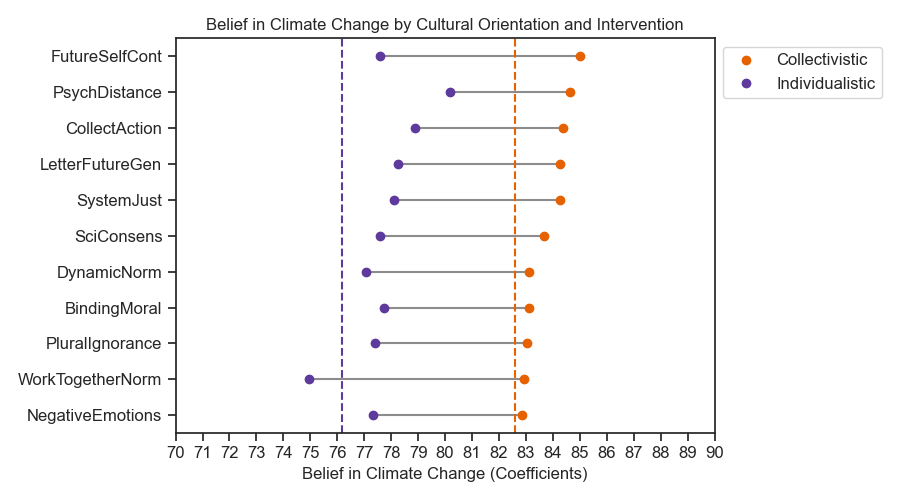

In [10]:
# Load the coefficients from the CSV files
coef_col_belief = pd.read_csv("coef_col_belief.csv")
coef_ind_belief = pd.read_csv("coef_ind_belief.csv")

# Rename the first column to "condName"
coef_col_belief.rename(columns={coef_col_belief.columns[0]: "condName"}, inplace=True)
coef_ind_belief.rename(columns={coef_ind_belief.columns[0]: "condName"}, inplace=True)

# Remove the preceding "condName" from each item in the "condName" column
coef_col_belief['condName'] = coef_col_belief['condName'].str.replace('condName', '')
coef_ind_belief['condName'] = coef_ind_belief['condName'].str.replace('condName', '')

# Extract the intercept values for the control condition
control_mean_col = coef_col_belief.loc[coef_col_belief['condName'] == '(Intercept)', 'Estimate'].values[0]
control_mean_ind = coef_ind_belief.loc[coef_ind_belief['condName'] == '(Intercept)', 'Estimate'].values[0]

# Remove the intercept row from the coefficients DataFrames
coef_col_belief = coef_col_belief[coef_col_belief['condName'] != '(Intercept)']
coef_ind_belief = coef_ind_belief[coef_ind_belief['condName'] != '(Intercept)']

# Sort the coefficients by the collectivistic scores
coef_col_sorted = coef_col_belief.sort_values(by='Estimate', ascending=False)
sorted_interventions = coef_col_sorted['condName'].values
sorted_coefficients_col = coef_col_sorted['Estimate'].values

# Get the individualistic coefficients in the same order as the sorted collectivistic interventions
coef_ind_sorted = coef_ind_belief.set_index('condName').loc[sorted_interventions].reset_index()
sorted_coefficients_ind = coef_ind_sorted['Estimate'].values

# Creating a Dot Plot with Connecting Lines with sorted data
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the points and lines
for i in range(len(sorted_interventions)):
    ax.plot([sorted_coefficients_col[i] + control_mean_col, sorted_coefficients_ind[i] + control_mean_ind], 
            [sorted_interventions[i], sorted_interventions[i]], 'k-', alpha=0.5)
    ax.plot(sorted_coefficients_col[i] + control_mean_col, sorted_interventions[i], 'o', 
            label='Collectivistic' if i == 0 else "", color='#E66100')
    ax.plot(sorted_coefficients_ind[i] + control_mean_ind, sorted_interventions[i], 'o', 
            label='Individualistic' if i == 0 else "", color='#5D3A9B')

# Adding labels and title
ax.set_xlabel('Belief in Climate Change (Coefficients)')
ax.set_title('Belief in Climate Change by Cultural Orientation and Intervention')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Inverting y-axis for better readability
ax.invert_yaxis()

# Add vertical lines that represent the control group mean
ax.axvline(control_mean_col, c="#E66100", ls="--", label='Control Mean (Collectivistic)')
ax.axvline(control_mean_ind, c="#5D3A9B", ls="--", label='Control Mean (Individualistic)')

# Manually setting tick marks
ax.set_xticks(range(70, 91)) 

fig.tight_layout()

# Save the figure
plt.savefig('fig_Belief_Coefficients.png', dpi=900, format="png")

# Display the figure
plt.show()

# 1.2 Policy Support

In [12]:
df_policy = pd.melt(
    df.loc[:, ['ResponseId', 'Country', 'condName', 'Ind_score', "Ind_ms", 'Income', 'Edu', 'Age', 'Gender', "GDP", "EPI",'Policy1', 'Policy2', 'Policy3', 'Policy4','Policy5', 'Policy6', 'Policy7', 'Policy8', 'Policy9']],
    id_vars=['ResponseId', 'Country', 'condName', 'Ind_score', "Ind_ms", 'Income', 'Edu', 'Age', 'Gender', "GDP", "EPI"],
    var_name="Item",
    value_name="Policy"
)
df_policy['condName'] = df_policy['condName'].replace(['Control'], 'aControl')
df_policy = df_policy.dropna(subset=["ResponseId", "Policy", "condName"])

In [13]:
df_col_policy = df_policy.loc[df_policy['Ind_ms']==1] #dataframe for collectivist countries
df_ind_policy = df_policy.loc[df_policy['Ind_ms']==2] #dataframe for individualist countries
%Rpush df_col_policy
%Rpush df_ind_policy

### Collectivist Countries

In [14]:
%%R
M1 <- lmer(Policy ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item), data = df_col_policy)
print(summary(M1))

write.csv(coef(summary(M1)), "coef_col_policy.csv") #export coefficients to csv

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Policy ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item)
   Data: df_col_policy

REML criterion at convergence: 1901984

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6188 -0.4948  0.1103  0.6516  4.3458 

Random effects:
 Groups     Name        Variance Std.Dev.
 ResponseId (Intercept) 220.42   14.847  
 Country    (Intercept)  22.03    4.693  
 Item       (Intercept) 125.51   11.203  
 Residual               449.52   21.202  
Number of obs: 208145, groups:  ResponseId, 24037; Country, 38; Item, 9

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                 72.6084     3.8291     8.8516  18.962 1.79e-08 ***
condNameBindingMoral         0.5359     0.5159 23797.4363   1.039   0.2990    
condNameCollectAction        2.4242     0.5116 23787.4037   4.739 2.16e-06 ***
condNameDynamicNorm          1.0544     0.5

### Individualist Countries

In [15]:
%%R
M1 <- lmer(Policy ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item), data = df_ind_policy)
print(summary(M1))

write.csv(coef(summary(M1)), "coef_ind_policy.csv") #export coefficients to csv

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Policy ~ condName + (1 | Country) + (1 | ResponseId) + (1 | Item)
   Data: df_ind_policy

REML criterion at convergence: 2742990

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8523 -0.5431  0.0448  0.6275  4.8557 

Random effects:
 Groups     Name        Variance Std.Dev.
 ResponseId (Intercept) 365.22   19.111  
 Country    (Intercept)  14.38    3.792  
 Item       (Intercept) 153.56   12.392  
 Residual               413.26   20.329  
Number of obs: 301125, groups:  ResponseId, 34345; Country, 25; Item, 9

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                 66.9462     4.2172     8.6712  15.875 1.04e-07 ***
condNameBindingMoral         0.8471     0.5308 34226.4609   1.596  0.11051    
condNameCollectAction        3.2704     0.5307 34217.4239   6.163 7.23e-10 ***
condNameDynamicNorm          1.1913     0.5

## Fig 3. POLICY SUPPORT

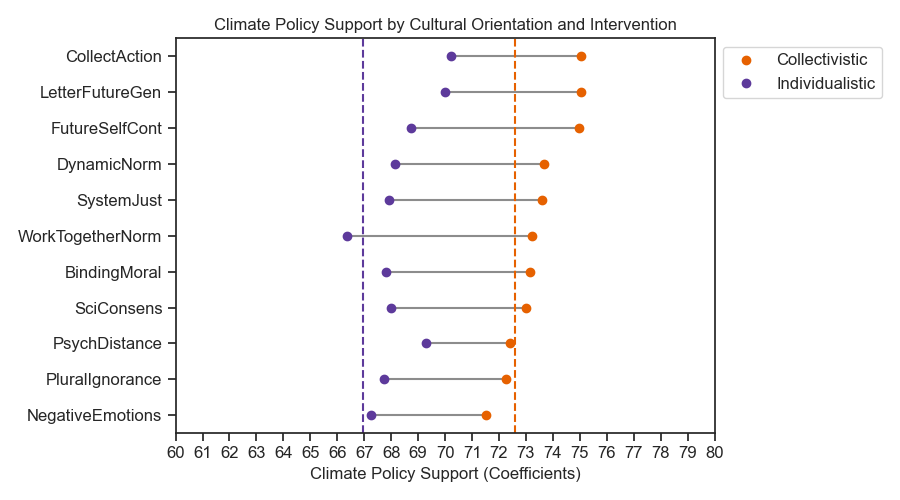

In [16]:
# Load the coefficients from the CSV files
coef_col_policy = pd.read_csv("coef_col_policy.csv")
coef_ind_policy = pd.read_csv("coef_ind_policy.csv")

# Rename the first column to "condName"
coef_col_policy.rename(columns={coef_col_policy.columns[0]: "condName"}, inplace=True)
coef_ind_policy.rename(columns={coef_ind_policy.columns[0]: "condName"}, inplace=True)

# Remove the preceding "condName" from each item in the "condName" column
coef_col_policy['condName'] = coef_col_policy['condName'].str.replace('condName', '')
coef_ind_policy['condName'] = coef_ind_policy['condName'].str.replace('condName', '')

# Extract the intercept values for the control condition
control_mean_col = coef_col_policy.loc[coef_col_policy['condName'] == '(Intercept)', 'Estimate'].values[0]
control_mean_ind = coef_ind_policy.loc[coef_ind_policy['condName'] == '(Intercept)', 'Estimate'].values[0]

# Remove the intercept row from the coefficients DataFrames
coef_col_policy = coef_col_policy[coef_col_policy['condName'] != '(Intercept)']
coef_ind_policy = coef_ind_policy[coef_ind_policy['condName'] != '(Intercept)']

# Sort the coefficients by the collectivistic scores
coef_col_sorted = coef_col_policy.sort_values(by='Estimate', ascending=False)
sorted_interventions = coef_col_sorted['condName'].values
sorted_coefficients_col = coef_col_sorted['Estimate'].values

# Get the individualistic coefficients in the same order as the sorted collectivistic interventions
coef_ind_sorted = coef_ind_policy.set_index('condName').loc[sorted_interventions].reset_index()
sorted_coefficients_ind = coef_ind_sorted['Estimate'].values

# Creating a Dot Plot with Connecting Lines with sorted data
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the points and lines
for i in range(len(sorted_interventions)):
    ax.plot([sorted_coefficients_col[i] + control_mean_col, sorted_coefficients_ind[i] + control_mean_ind], 
            [sorted_interventions[i], sorted_interventions[i]], 'k-', alpha=0.5)
    ax.plot(sorted_coefficients_col[i] + control_mean_col, sorted_interventions[i], 'o', 
            label='Collectivistic' if i == 0 else "", color='#E66100')
    ax.plot(sorted_coefficients_ind[i] + control_mean_ind, sorted_interventions[i], 'o', 
            label='Individualistic' if i == 0 else "", color='#5D3A9B')

# Adding labels and title
ax.set_xlabel('Climate Policy Support (Coefficients)')
ax.set_title('Climate Policy Support by Cultural Orientation and Intervention')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Inverting y-axis for better readability
ax.invert_yaxis()

# Add vertical lines that represent the control group mean
ax.axvline(control_mean_col, c="#E66100", ls="--", label='Control Mean (Collectivistic)')
ax.axvline(control_mean_ind, c="#5D3A9B", ls="--", label='Control Mean (Individualistic)')

# Manually setting tick marks
ax.set_xticks(range(60, 81)) 

fig.tight_layout()

# Save the figure
plt.savefig('fig_policy_Coefficients.png', dpi=900, format="png")

# Display the figure
plt.show()

# 1.3 Sharing

In [17]:
cols_to_check = ["ResponseId", "condName", "SHAREcc"]
df_share = df.dropna(subset=cols_to_check)
df_share['condName'] = df_share['condName'].replace(['Control'], 'aControl')

In [18]:
df_col_share = df_share.loc[df_share['Ind_ms']==1] #dataframe for collectivist countries
df_ind_share = df_share.loc[df_share['Ind_ms']==2] #dataframe for individualist countries
%Rpush df_col_share
%Rpush df_ind_share

### Collectivist Countries

In [19]:
%%R
M1 <- glmer(SHAREcc ~ condName + (1 | Country), family = binomial, data = df_col_share)
print(summary(M1))

write.csv(coef(summary(M1)), "coef_col_share.csv") #export coefficients to csv

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: SHAREcc ~ condName + (1 | Country)
   Data: df_col_share

     AIC      BIC   logLik deviance df.resid 
 20390.7  20492.9 -10182.4  20364.7    19115 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3089 -0.6039  0.4191  0.5981  2.5610 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 1.206    1.098   
Number of obs: 19128, groups:  Country, 38

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               0.42911    0.18717   2.293 0.021866 *  
condNameBindingMoral      0.30532    0.08076   3.780 0.000157 ***
condNameCollectAction     0.60396    0.08251   7.320 2.48e-13 ***
condNameDynamicNorm       0.45772    0.08132   5.628 1.82e-08 ***
condNameFutureSelfCont    0.41964    0.08591   4.885 1.03e-06 ***
condNameLetterFutureGen   0.42238    0.08659   4.878 1.07e-06 ***


### Individualist Countries

In [20]:
%%R
M1 <- glmer(SHAREcc ~ condName + (1 | Country), family = binomial, data = df_ind_share)
print(summary(M1))

write.csv(coef(summary(M1)), "coef_ind_share.csv") #export coefficients to csv

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: SHAREcc ~ condName + (1 | Country)
   Data: df_ind_share

     AIC      BIC   logLik deviance df.resid 
 31354.9  31460.3 -15664.4  31328.9    24515 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9760 -0.8137 -0.4808  0.8616  2.4138 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.5497   0.7414  
Number of obs: 24528, groups:  Country, 25

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.54520    0.15538  -3.509 0.000450 ***
condNameBindingMoral      0.11517    0.06454   1.785 0.074328 .  
condNameCollectAction     0.26636    0.06551   4.066 4.78e-05 ***
condNameDynamicNorm       0.21923    0.06499   3.373 0.000742 ***
condNameFutureSelfCont    0.25089    0.06874   3.650 0.000263 ***
condNameLetterFutureGen   0.37938    0.07024   5.401 6.61e-08 ***


## Fig 4. INFORMATION SHARING

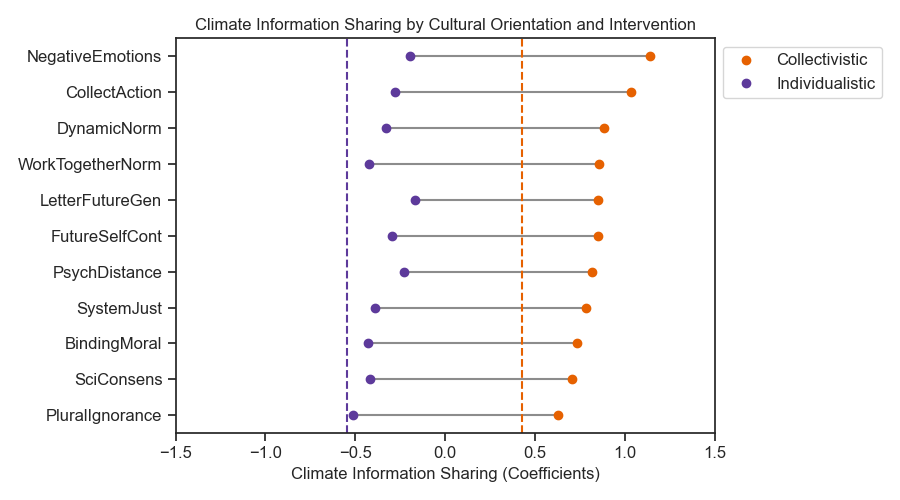

In [21]:
### HERE WE ARE PLOTTING THE LOG-ODDS DIRECTLY FROM THE MODEL OUTPUTS, but we should probably be converting them to odds ratios so theyre interpretable/intuitive

# Load the coefficients from the CSV files
coef_col_SHAREcc = pd.read_csv("coef_col_share.csv")
coef_ind_SHAREcc = pd.read_csv("coef_ind_share.csv")

# Rename the first column to "condName"
coef_col_SHAREcc.rename(columns={coef_col_SHAREcc.columns[0]: "condName"}, inplace=True)
coef_ind_SHAREcc.rename(columns={coef_ind_SHAREcc.columns[0]: "condName"}, inplace=True)

# Remove the preceding "condName" from each item in the "condName" column
coef_col_SHAREcc['condName'] = coef_col_SHAREcc['condName'].str.replace('condName', '')
coef_ind_SHAREcc['condName'] = coef_ind_SHAREcc['condName'].str.replace('condName', '')

# Extract the intercept values for the control condition
control_mean_col = coef_col_SHAREcc.loc[coef_col_SHAREcc['condName'] == '(Intercept)', 'Estimate'].values[0]
control_mean_ind = coef_ind_SHAREcc.loc[coef_ind_SHAREcc['condName'] == '(Intercept)', 'Estimate'].values[0]

# Remove the intercept row from the coefficients DataFrames
coef_col_SHAREcc = coef_col_SHAREcc[coef_col_SHAREcc['condName'] != '(Intercept)']
coef_ind_SHAREcc = coef_ind_SHAREcc[coef_ind_SHAREcc['condName'] != '(Intercept)']

# Sort the coefficients by the collectivistic scores
coef_col_sorted = coef_col_SHAREcc.sort_values(by='Estimate', ascending=False)
sorted_interventions = coef_col_sorted['condName'].values
sorted_coefficients_col = coef_col_sorted['Estimate'].values

# Get the individualistic coefficients in the same order as the sorted collectivistic interventions
coef_ind_sorted = coef_ind_SHAREcc.set_index('condName').loc[sorted_interventions].reset_index()
sorted_coefficients_ind = coef_ind_sorted['Estimate'].values

# Creating a Dot Plot with Connecting Lines with sorted data
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the points and lines
for i in range(len(sorted_interventions)):
    ax.plot([sorted_coefficients_col[i] + control_mean_col, sorted_coefficients_ind[i] + control_mean_ind], 
            [sorted_interventions[i], sorted_interventions[i]], 'k-', alpha=0.5)
    ax.plot(sorted_coefficients_col[i] + control_mean_col, sorted_interventions[i], 'o', 
            label='Collectivistic' if i == 0 else "", color='#E66100')
    ax.plot(sorted_coefficients_ind[i] + control_mean_ind, sorted_interventions[i], 'o', 
            label='Individualistic' if i == 0 else "", color='#5D3A9B')

# Adding labels and title
ax.set_xlabel('Climate Information Sharing (Coefficients)')
ax.set_title('Climate Information Sharing by Cultural Orientation and Intervention')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Inverting y-axis for better readability
ax.invert_yaxis()

# Add vertical lines that represent the control group mean
ax.axvline(control_mean_col, c="#E66100", ls="--", label='Control Mean (Collectivistic)')
ax.axvline(control_mean_ind, c="#5D3A9B", ls="--", label='Control Mean (Individualistic)')

# Manually setting tick marks
#ax.set_xticks(range(-1, 1)) 
# Manually setting tick marks at every 0.5
ax.set_xticks(np.arange(-1.5, 2, 0.5))

fig.tight_layout()

# Save the figure
#plt.savefig('fig_SHAREcc_Coefficients.png', dpi=900, format="png")

# Display the figure
plt.show()

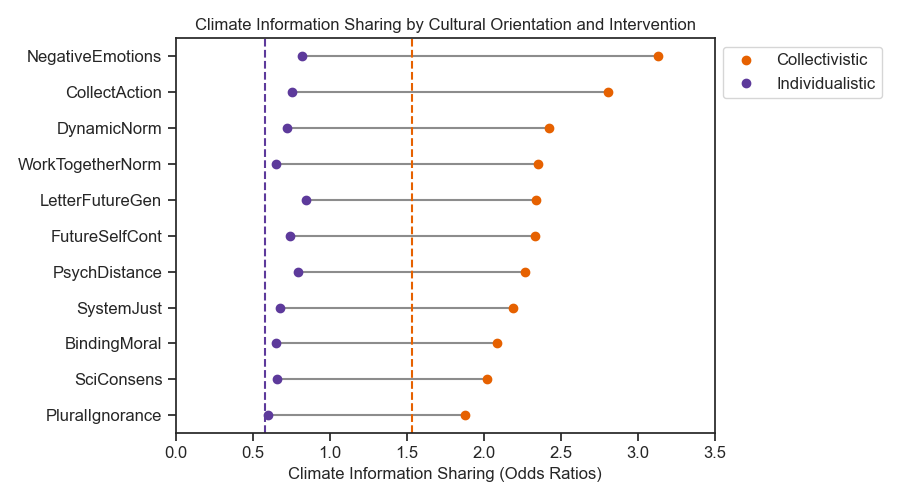

In [22]:
## USE THIS ONE!!! IT'S THE ODDS RATIOS

# Load the coefficients from the CSV files
coef_col_SHAREcc = pd.read_csv("coef_col_share.csv")
coef_ind_SHAREcc = pd.read_csv("coef_ind_share.csv")

# Rename the first column to "condName"
coef_col_SHAREcc.rename(columns={coef_col_SHAREcc.columns[0]: "condName"}, inplace=True)
coef_ind_SHAREcc.rename(columns={coef_ind_SHAREcc.columns[0]: "condName"}, inplace=True)

# Remove the preceding "condName" from each item in the "condName" column
coef_col_SHAREcc['condName'] = coef_col_SHAREcc['condName'].str.replace('condName', '')
coef_ind_SHAREcc['condName'] = coef_ind_SHAREcc['condName'].str.replace('condName', '')

# Extract the intercept values for the control condition
control_mean_col = coef_col_SHAREcc.loc[coef_col_SHAREcc['condName'] == '(Intercept)', 'Estimate'].values[0]
control_mean_ind = coef_ind_SHAREcc.loc[coef_ind_SHAREcc['condName'] == '(Intercept)', 'Estimate'].values[0]

# Remove the intercept row from the coefficients DataFrames
coef_col_SHAREcc = coef_col_SHAREcc[coef_col_SHAREcc['condName'] != '(Intercept)']
coef_ind_SHAREcc = coef_ind_SHAREcc[coef_ind_SHAREcc['condName'] != '(Intercept)']

# Sort the coefficients by the collectivistic scores
coef_col_sorted = coef_col_SHAREcc.sort_values(by='Estimate', ascending=False)
sorted_interventions = coef_col_sorted['condName'].values
sorted_coefficients_col = coef_col_sorted['Estimate'].values

# Get the individualistic coefficients in the same order as the sorted collectivistic interventions
coef_ind_sorted = coef_ind_SHAREcc.set_index('condName').loc[sorted_interventions].reset_index()
sorted_coefficients_ind = coef_ind_sorted['Estimate'].values

# Convert log-odds coefficients to odds ratios
sorted_odds_ratios_col = np.exp(sorted_coefficients_col)
sorted_odds_ratios_ind = np.exp(sorted_coefficients_ind)
control_odds_ratio_col = np.exp(control_mean_col)
control_odds_ratio_ind = np.exp(control_mean_ind)

# Creating a Dot Plot with Connecting Lines with sorted data
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the points and lines
for i in range(len(sorted_interventions)):
    ax.plot([sorted_odds_ratios_col[i] * control_odds_ratio_col, sorted_odds_ratios_ind[i] * control_odds_ratio_ind], 
            [sorted_interventions[i], sorted_interventions[i]], 'k-', alpha=0.5)
    ax.plot(sorted_odds_ratios_col[i] * control_odds_ratio_col, sorted_interventions[i], 'o', 
            label='Collectivistic' if i == 0 else "", color='#E66100')
    ax.plot(sorted_odds_ratios_ind[i] * control_odds_ratio_ind, sorted_interventions[i], 'o', 
            label='Individualistic' if i == 0 else "", color='#5D3A9B')

# Adding labels and title
ax.set_xlabel('Climate Information Sharing (Odds Ratios)')
ax.set_title('Climate Information Sharing by Cultural Orientation and Intervention')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Inverting y-axis for better readability
ax.invert_yaxis()

# Add vertical lines that represent the control group odds ratios
ax.axvline(control_odds_ratio_col, c="#E66100", ls="--", label='Control Odds Ratio (Collectivistic)')
ax.axvline(control_odds_ratio_ind, c="#5D3A9B", ls="--", label='Control Odds Ratio (Individualistic)')

# Manually setting tick marks at every 0.5
ax.set_xticks(np.arange(0, 4.0, 0.5))

fig.tight_layout()

# Save the figure
plt.savefig('fig_SHAREcc_OddsRatios.png', dpi=900, format="png")

# Display the figure
plt.show()

##THIS IS CORRECT!
#Here's a spot check using the model output for the collectivistic countries:
# In this model: Intercept (Estimate = 0.42912): The intercept represents the log-odds of sharing (SHAREcc = 1) in the reference condition (AControl). 
    # Since this is a logistic regression, the intercept is the log of the odds that a participant in the AControl condition will choose to share. 
    # To convert this to an odds ratio, you can exponentiate the intercept. This means that the odds of sharing in the AControl condition are approximately 1.536 to 1.
# Other coefficients (e.g., condNameBindingMoral = 0.30532): These coefficients represent the difference in the log-odds of sharing between the respective condition and the AControl condition. 
    # For example: The odds of sharing in the BindingMoral condition are 1.357 times the odds of sharing in the AControl condition. (and then if you do 1.536*1.357, you get 2.08, which is where the BindingMoral point is.

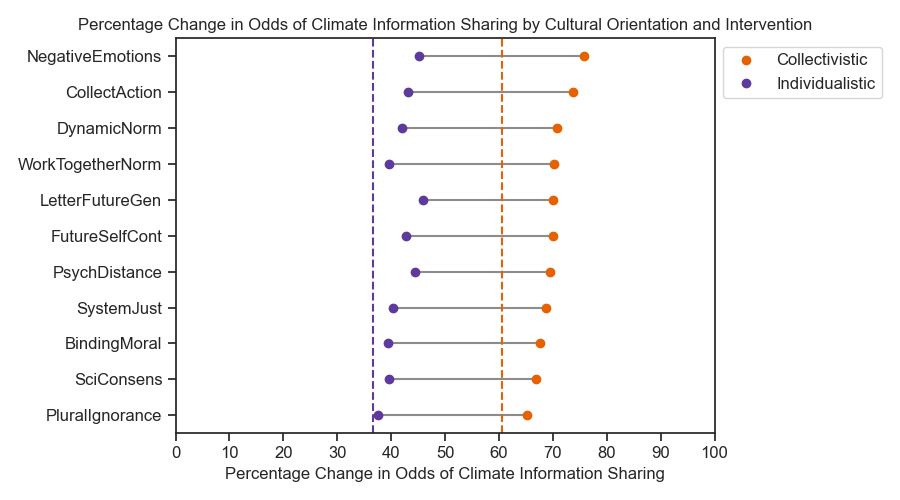

In [34]:
# Load the coefficients from the CSV files
coef_col_SHAREcc = pd.read_csv("coef_col_share.csv")
coef_ind_SHAREcc = pd.read_csv("coef_ind_share.csv")

# Rename the first column to "condName"
coef_col_SHAREcc.rename(columns={coef_col_SHAREcc.columns[0]: "condName"}, inplace=True)
coef_ind_SHAREcc.rename(columns={coef_ind_SHAREcc.columns[0]: "condName"}, inplace=True)

# Remove the preceding "condName" from each item in the "condName" column
coef_col_SHAREcc['condName'] = coef_col_SHAREcc['condName'].str.replace('condName', '')
coef_ind_SHAREcc['condName'] = coef_ind_SHAREcc['condName'].str.replace('condName', '')

# Extract the intercept values for the control condition
log_odds_control_mean_col = coef_col_SHAREcc.loc[coef_col_SHAREcc['condName'] == '(Intercept)', 'Estimate'].values[0]
log_odds_control_mean_ind = coef_ind_SHAREcc.loc[coef_ind_SHAREcc['condName'] == '(Intercept)', 'Estimate'].values[0]

# Convert the log-odds to probabilities for intercepts
control_mean_col_prob = 1 / (1 + np.exp(-log_odds_control_mean_col))
control_mean_ind_prob = 1 / (1 + np.exp(-log_odds_control_mean_ind))

# Remove the intercept row from the coefficients DataFrames
coef_col_SHAREcc = coef_col_SHAREcc[coef_col_SHAREcc['condName'] != '(Intercept)']
coef_ind_SHAREcc = coef_ind_SHAREcc[coef_ind_SHAREcc['condName'] != '(Intercept)']

# Convert the log-odds (coefficients) to probabilities and adjust with respect to intercepts
coef_col_SHAREcc['Adjusted Probability'] = 1 / (1 + np.exp(-(log_odds_control_mean_col + coef_col_SHAREcc['Estimate'])))
coef_ind_SHAREcc['Adjusted Probability'] = 1 / (1 + np.exp(-(log_odds_control_mean_ind + coef_ind_SHAREcc['Estimate'])))

# Convert the probabilities to percentages
coef_col_SHAREcc['Percentage'] = coef_col_SHAREcc['Adjusted Probability'] * 100
coef_ind_SHAREcc['Percentage'] = coef_ind_SHAREcc['Adjusted Probability'] * 100

# Convert the control means to percentages
control_mean_col = control_mean_col_prob * 100
control_mean_ind = control_mean_ind_prob * 100

# Sort the coefficients by the collectivistic percentages
coef_col_sorted = coef_col_SHAREcc.sort_values(by='Percentage', ascending=False)
sorted_interventions = coef_col_sorted['condName'].values
sorted_percentages_col = coef_col_sorted['Percentage'].values

# Get the individualistic probabilities in the same order as the sorted collectivistic interventions
coef_ind_sorted = coef_ind_SHAREcc.set_index('condName').loc[sorted_interventions].reset_index()
sorted_percentages_ind = coef_ind_sorted['Percentage'].values

# Creating a Dot Plot with Connecting Lines with sorted data
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the points and lines
for i in range(len(sorted_interventions)):
    ax.plot([sorted_percentages_col[i], sorted_percentages_ind[i]], 
            [sorted_interventions[i], sorted_interventions[i]], 'k-', alpha=0.5)
    ax.plot(sorted_percentages_col[i], sorted_interventions[i], 'o', 
            label='Collectivistic' if i == 0 else "", color='#E66100')
    ax.plot(sorted_percentages_ind[i], sorted_interventions[i], 'o', 
            label='Individualistic' if i == 0 else "", color='#5D3A9B')

# Adding labels and title
ax.set_xlabel('Percentage Change in Odds of Climate Information Sharing')
ax.set_title('Percentage Change in Odds of Climate Information Sharing by Cultural Orientation and Intervention')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Inverting y-axis for better readability
ax.invert_yaxis()

# Add vertical lines that represent the control group mean
ax.axvline(control_mean_col, c="#E66100", ls="--", label='Control Mean (Collectivistic)')
ax.axvline(control_mean_ind, c="#5D3A9B", ls="--", label='Control Mean (Individualistic)')

# Manually setting tick marks
ax.set_xticks(np.arange(0, 101, 10))

fig.tight_layout()

# Save the figure
# plt.savefig('fig_SHAREcc_Percentages.png', dpi=900, format="png")

# Display the figure
plt.show()

# 1.4 WEPT

In [26]:
cols_to_check = ["ResponseId", "condName", "WEPTcc"]
df_WEPT = df.dropna(subset=cols_to_check)
df_WEPT['condName'] = df_WEPT['condName'].replace(['Control'], 'aControl')

In [27]:
df_col_WEPT = df_WEPT.loc[df_WEPT['Ind_ms']==1] #dataframe for collectivist countries
df_ind_WEPT = df_WEPT.loc[df_WEPT['Ind_ms']==2] #dataframe for individualist countries
%Rpush df_col_WEPT
%Rpush df_ind_WEPT

### Collectivist Countries

In [28]:
%%R
M1 <- clmm(as.factor(WEPTcc) ~ condName + (1 | Country), data = df_col_WEPT, threshold = "equidistant")
print(summary(M1))

write.csv(coef(summary(M1)), "coef_col_wept.csv") #export coefficients to csv

Cumulative Link Mixed Model fitted with the Laplace approximation

formula: as.factor(WEPTcc) ~ condName + (1 | Country)
data:    df_col_WEPT

 link  threshold   nobs  logLik    AIC      niter      max.grad cond.H 
 logit equidistant 24233 -39844.78 79717.55 1899(7601) 1.61e-01 5.7e+03

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.2804   0.5295  
Number of groups:  Country 38 

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
condNameBindingMoral     -0.04640    0.05953  -0.779  0.43573    
condNameCollectAction    -0.10225    0.05885  -1.737  0.08230 .  
condNameDynamicNorm      -0.04160    0.05902  -0.705  0.48091    
condNameFutureSelfCont   -0.17534    0.06152  -2.850  0.00437 ** 
condNameLetterFutureGen  -0.24772    0.06118  -4.049 5.14e-05 ***
condNameNegativeEmotions -0.32770    0.05831  -5.619 1.92e-08 ***
condNamePluralIgnorance  -0.13630    0.05934  -2.297  0.02161 *  
condNamePsychDistance    -0.33337    0.06084

### Individualist Countries

In [29]:
%%R
M1 <- clmm(as.factor(WEPTcc) ~ condName + (1 | Country), data = df_ind_WEPT, threshold = "equidistant")
print(summary(M1))

write.csv(coef(summary(M1)), "coef_ind_wept.csv") #export coefficients to csv

Cumulative Link Mixed Model fitted with the Laplace approximation

formula: as.factor(WEPTcc) ~ condName + (1 | Country)
data:    df_ind_WEPT

 link  threshold   nobs  logLik    AIC       niter      max.grad cond.H 
 logit equidistant 34647 -56474.87 112977.75 1617(4856) 7.17e-02 8.2e+03

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 0.1401   0.3743  
Number of groups:  Country 25 

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
condNameBindingMoral      0.07717    0.04961   1.556  0.11982    
condNameCollectAction    -0.12802    0.04896  -2.615  0.00893 ** 
condNameDynamicNorm       0.03136    0.04930   0.636  0.52474    
condNameFutureSelfCont   -0.08601    0.05206  -1.652  0.09851 .  
condNameLetterFutureGen  -0.21412    0.05257  -4.073 4.64e-05 ***
condNameNegativeEmotions -0.26765    0.04855  -5.512 3.54e-08 ***
condNamePluralIgnorance  -0.02134    0.04897  -0.436  0.66297    
condNamePsychDistance    -0.23899    0.049

In [30]:
# Calculate the mean WEPTcc for collectivistic countries
mean_wept_col = df_col['WEPTcc'].mean()

# Calculate the mean WEPTcc for individualistic countries
mean_wept_ind = df_ind['WEPTcc'].mean()

print(mean_wept_col)
print(mean_wept_ind)

4.8593962357398786
4.816092607867118


In [31]:
# Filter rows where condName is 'control'
df_col_control = df_col[df_col['condName'] == 'Control']
df_ind_control = df_ind[df_ind['condName'] == 'Control']

# Calculate the mean WEPTcc for collectivistic countries where condName is 'control'
mean_wept_col_control = df_col_control['WEPTcc'].mean()

# Calculate the mean WEPTcc for individualistic countries where condName is 'control'
mean_wept_ind_control = df_ind_control['WEPTcc'].mean()

print("Mean WEPTcc for collectivistic countries (control):", mean_wept_col_control)
print("Mean WEPTcc for individualistic countries (control):", mean_wept_ind_control)

Mean WEPTcc for collectivistic countries (control): 5.105112279025323
Mean WEPTcc for individualistic countries (control): 4.9241310160427805


## Fig 5. WEPT

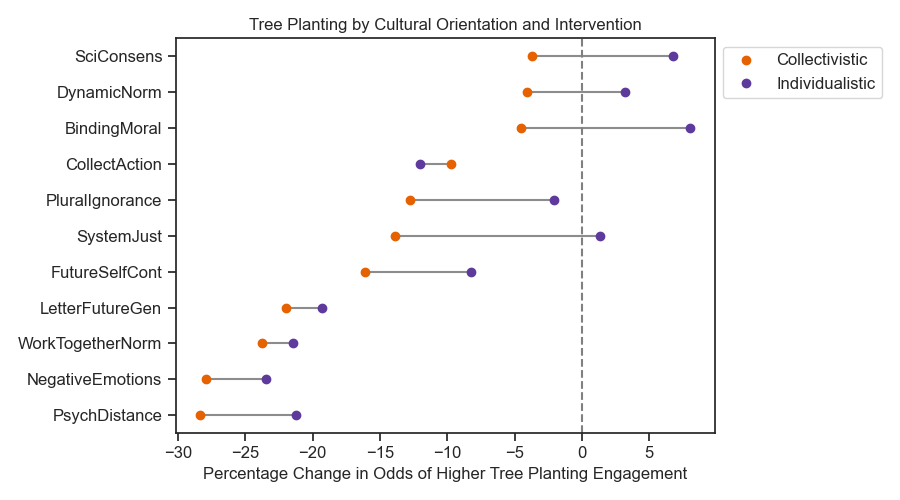

In [32]:
# Load the coefficients from the CSV files
coef_col_WEPTcc = pd.read_csv("coef_col_wept.csv")
coef_ind_WEPTcc = pd.read_csv("coef_ind_wept.csv")

# Rename the first column to "condName"
coef_col_WEPTcc.rename(columns={coef_col_WEPTcc.columns[0]: "condName"}, inplace=True)
coef_ind_WEPTcc.rename(columns={coef_ind_WEPTcc.columns[0]: "condName"}, inplace=True)

# Remove the preceding "condName" from each item in the "condName" column
coef_col_WEPTcc['condName'] = coef_col_WEPTcc['condName'].str.replace('condName', '')
coef_ind_WEPTcc['condName'] = coef_ind_WEPTcc['condName'].str.replace('condName', '')

# Filter out "threshold.1" and "spacing" rows
coef_col_WEPTcc = coef_col_WEPTcc[~coef_col_WEPTcc['condName'].isin(['threshold.1', 'spacing'])]
coef_ind_WEPTcc = coef_ind_WEPTcc[~coef_ind_WEPTcc['condName'].isin(['threshold.1', 'spacing'])]

# Check for the presence of the intercept and extract its value
if '(Intercept)' in coef_col_WEPTcc['condName'].values:
    log_odds_control_mean_col = coef_col_WEPTcc.loc[coef_col_WEPTcc['condName'] == '(Intercept)', 'Estimate'].values[0]
else:
    log_odds_control_mean_col = 0  # Default value if intercept is not found

if '(Intercept)' in coef_ind_WEPTcc['condName'].values:
    log_odds_control_mean_ind = coef_ind_WEPTcc.loc[coef_ind_WEPTcc['condName'] == '(Intercept)', 'Estimate'].values[0]
else:
    log_odds_control_mean_ind = 0  # Default value if intercept is not found

# Convert the log-odds to odds for intercepts
control_mean_col_odds = np.exp(log_odds_control_mean_col)
control_mean_ind_odds = np.exp(log_odds_control_mean_ind)

# Remove the intercept row from the coefficients DataFrames
coef_col_WEPTcc = coef_col_WEPTcc[coef_col_WEPTcc['condName'] != '(Intercept)']
coef_ind_WEPTcc = coef_ind_WEPTcc[coef_ind_WEPTcc['condName'] != '(Intercept)']

# Convert the log-odds (coefficients) to odds and adjust with respect to intercepts
coef_col_WEPTcc['Adjusted Odds'] = np.exp(log_odds_control_mean_col + coef_col_WEPTcc['Estimate'])
coef_ind_WEPTcc['Adjusted Odds'] = np.exp(log_odds_control_mean_ind + coef_ind_WEPTcc['Estimate'])

# Calculate percentage change in odds
coef_col_WEPTcc['Percentage Change'] = (coef_col_WEPTcc['Adjusted Odds'] / control_mean_col_odds - 1) * 100
coef_ind_WEPTcc['Percentage Change'] = (coef_ind_WEPTcc['Adjusted Odds'] / control_mean_ind_odds - 1) * 100

# Sort the coefficients by the collectivistic percentages
coef_col_sorted = coef_col_WEPTcc.sort_values(by='Percentage Change', ascending=False)
sorted_interventions = coef_col_sorted['condName'].values
sorted_percentages_col = coef_col_sorted['Percentage Change'].values

# Get the individualistic percentages in the same order as the sorted collectivistic interventions
coef_ind_sorted = coef_ind_WEPTcc.set_index('condName').loc[sorted_interventions].reset_index()
sorted_percentages_ind = coef_ind_sorted['Percentage Change'].values

# Creating a Dot Plot with Connecting Lines with sorted data
fig, ax = plt.subplots(figsize=(9, 5))

# Plotting the points and lines
for i in range(len(sorted_interventions)):
    ax.plot([sorted_percentages_col[i], sorted_percentages_ind[i]], 
            [sorted_interventions[i], sorted_interventions[i]], 'k-', alpha=0.5)
    ax.plot(sorted_percentages_col[i], sorted_interventions[i], 'o', 
            label='Collectivistic' if i == 0 else "", color='#E66100')
    ax.plot(sorted_percentages_ind[i], sorted_interventions[i], 'o', 
            label='Individualistic' if i == 0 else "", color='#5D3A9B')

# Adding labels and title
ax.set_xlabel('Percentage Change in Odds of Higher Tree Planting Engagement')
ax.set_title('Tree Planting by Cultural Orientation and Intervention')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Inverting y-axis for better readability
ax.invert_yaxis()

# Add vertical lines that represent the control group mean (0% change)
ax.axvline(0, c="gray", ls="--", label='Control Mean')

# Manually setting tick marks
#ax.set_xticks(np.arange(-50, 51, 10))

fig.tight_layout()

# Save the figure
plt.savefig('fig_WEPTcc_Percentages.png', dpi=900, format="png")

# Display the figure
plt.show()